# Support Vector Machine (SVM)

## Linear kernel 

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(X)

X_scaled = sc.transform(X)

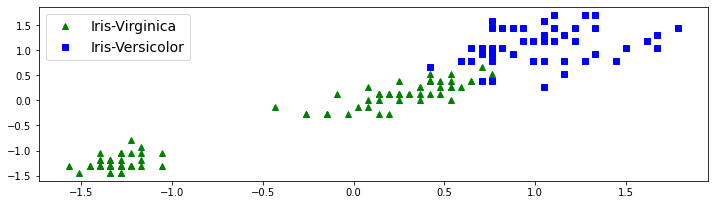

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,3.2))

plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "g^", label="Iris-Virginica")
plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.legend(loc="upper left", fontsize=14)

In [ ]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=10, loss="hinge")
svm_clf.fit(X_scaled, y)

LinearSVC(C=10, loss='hinge')

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [ ]:
from sklearn.pipeline import Pipeline

svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ))
svm_clf.fit(X_scaled, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
svm_clf.predict([[5.5, 1.7]])

## Non-linear classifier 

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

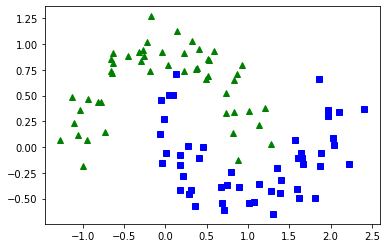

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
            ("poly_features", PolynomialFeatures(degree=3)),
            ("scaler", StandardScaler()),
            ("svm_clf", LinearSVC(C=10, loss="hinge"))
        ))

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

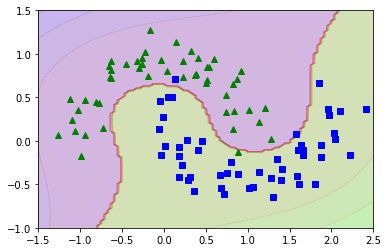

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.show()

# Decision Tree

In [ ]:
import pandas as pd

dataset = pd.read_csv('drive/MyDrive/ML/golf/golf.csv', index_col=False)

In [ ]:
dataset.head(20)

,day,outlook,temperature,humidity,wind,play
0,1,sunny,hot,high,weak,no
1,2,sunny,hot,high,strong,no
2,3,overcast,hot,high,weak,yes
3,4,rainy,mild,high,weak,yes
4,5,rainy,cool,normal,weak,yes
5,6,rainy,cool,normal,strong,no
6,7,overcast,cool,normal,strong,yes
7,8,sunny,mild,high,weak,no
8,9,sunny,cool,normal,weak,yes
9,10,rainy,mild,normal,weak,yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy

le = LabelEncoder()
cols = dataset.columns
dataset_encoded = deepcopy(dataset)
for c in cols:
    dataset_encoded[c] = le.fit_transform(dataset_encoded[c])

In [ ]:
X = dataset_encoded.iloc[:, 1:5]
y = dataset_encoded['play']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')

model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, feature_names=dataset.columns[1:5]) 
graph = graphviz.Source(dot_data) 
graph.render('tree.png')

'tree.png.pdf'

In [ ]:
dataset.columns[1:5]

Index(['outlook', 'temperature', 'humidity', 'wind'], dtype='object')